# Ch `12`: Concept `01`

### Ranking by neural network

In [1]:
import tensorflow as tf
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt

/home/zt/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


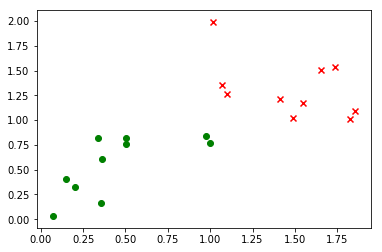

In [2]:
n_features = 2

def get_data():
    data_a = np.random.rand(10, n_features) + 1
    data_b = np.random.rand(10, n_features)
    
    plt.scatter(data_a[:, 0], data_a[:, 1], c='r', marker='x')
    plt.scatter(data_b[:, 0], data_b[:, 1], c='g', marker='o')
    plt.show()
    
    return data_a, data_b

def get_data2():
    data_a = np.asarray([[0.1, 0.9], [0.1, 0.8]])
    data_b = np.asarray([[0.4,0.05], [0.45, 0.1]])
    
    plt.scatter(data_a[:, 0], data_a[:, 1], c='r', marker='x')
    plt.scatter(data_b[:, 0], data_b[:, 1], c='g', marker='o')
    plt.xlim([0, 0.5])
    plt.ylim([0, 1])
    plt.axes().set_aspect('equal')
    plt.show()
    
    
    return data_a, data_b

data_a, data_b = get_data()

In [3]:
n_hidden = 10

In [4]:
# 定义输入层
with tf.name_scope("input"):
    x1 = tf.placeholder(tf.float32, [None, n_features], name="x1")
    x2 = tf.placeholder(tf.float32, [None, n_features], name="x2")
    dropout_keep_prob = tf.placeholder(tf.float32, name='dropout_prob')


# 定义隐藏层    
with tf.name_scope("hidden_layer"):
    with tf.name_scope("weights"):
        w1 = tf.Variable(tf.random_normal([n_features, n_hidden]), name="w1")
        tf.summary.histogram("w1", w1)
        b1 = tf.Variable(tf.random_normal([n_hidden]), name="b1")
        tf.summary.histogram("b1", b1)
 
    with tf.name_scope("output"):
        h1 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1,w1) + b1), keep_prob=dropout_keep_prob)
        tf.summary.histogram("h1", h1)
        h2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x2, w1) + b1), keep_prob=dropout_keep_prob)
        tf.summary.histogram("h2", h2)

# 定义 输出层
with tf.name_scope("output_layer"):
    with tf.name_scope("weights"):
        w2 = tf.Variable(tf.random_normal([n_hidden, 1]), name="w2")
        tf.summary.histogram("w2", w2)
        b2 = tf.Variable(tf.random_normal([1]), name="b2")
        tf.summary.histogram("b2", b2)
 
    with tf.name_scope("output"):
        s1 = tf.matmul(h1, w2) + b2
        s2 = tf.matmul(h2, w2) + b2

In [5]:
# 定义损失层
with tf.name_scope("loss"):
    s12 = s1 - s2
    s12_flat = tf.reshape(s12, [-1])
    
    pred = tf.sigmoid(s12)
    lable_p = tf.sigmoid(-tf.ones_like(s12))
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=tf.zeros_like(s12_flat), logits=s12_flat + 1)
    
    loss = tf.reduce_mean(cross_entropy)
    tf.summary.scalar("loss", loss)

# 定义优化函数
with tf.name_scope("train_op"):
    train_op = tf.train.AdamOptimizer(0.001).minimize(loss)

In [6]:
sess = tf.InteractiveSession()
summary_op = tf.summary.merge_all()  # 收集训练的结果，用于写入文件
writer = tf.summary.FileWriter("tb_files", sess.graph) # 把summary_op的结果写入模型文件
init = tf.global_variables_initializer()  # 初始化所有变量
sess.run(init)

In [7]:
for epoch in range(0, 10000):
    # 训练参数
    loss_val, _ = sess.run([loss, train_op], feed_dict={x1:data_a, x2:data_b, dropout_keep_prob:0.5})
    if epoch % 100 == 0 :
        # 保存模型
        summary_result = sess.run(summary_op, feed_dict={x1:data_a, x2:data_b, dropout_keep_prob:1})
        writer.add_summary(summary_result, epoch)
        print("Epoch {}: Loss {}".format(epoch, loss_val))

In [8]:
grid_size = 10
data_test = []
for y in np.linspace(0., 1., num=grid_size):
    for x in np.linspace(0., 1., num=grid_size):
        data_test.append([x, y])

In [9]:

def visualize_results(data_test):
    plt.figure()
    scores_test = sess.run(s1, feed_dict={x1:data_test, dropout_keep_prob:1})
    scores_img = np.reshape(scores_test, [grid_size, grid_size])
    plt.imshow(scores_img, origin='lower')
    plt.colorbar()

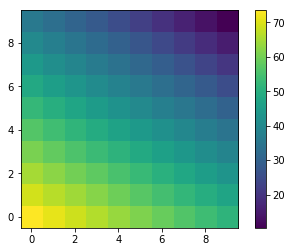

In [10]:
visualize_results(data_test)